In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing Data

In [2]:
try:
    train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
    test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
except FileNotFoundError:
    train_data = pd.read_csv('Data/train.csv')
    test_data = pd.read_csv('Data/test.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Exploration

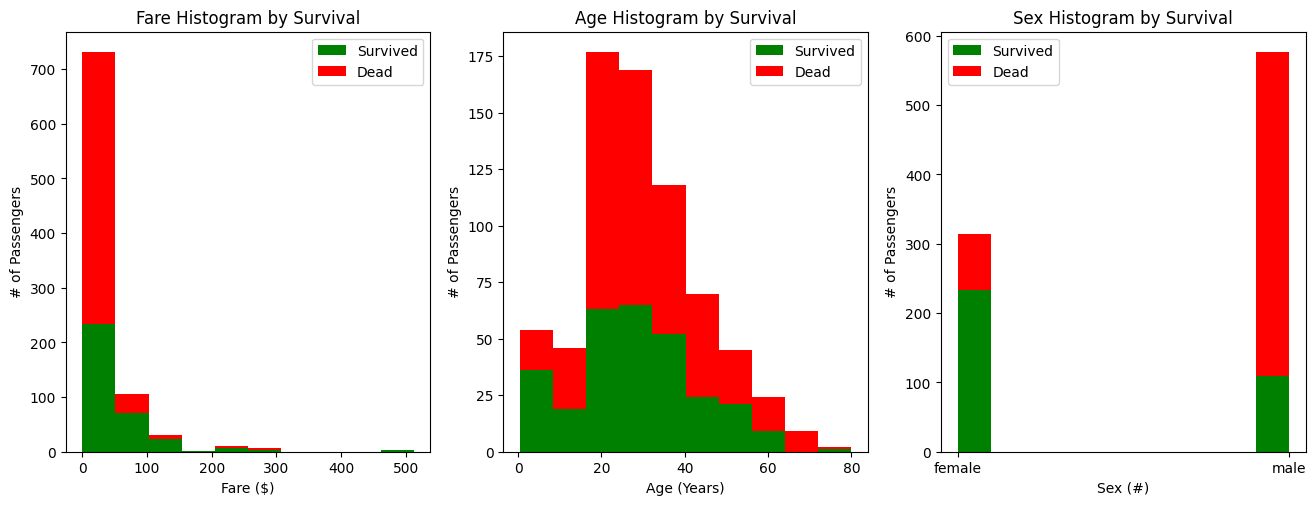

In [3]:
plt.figure(figsize=[16, 12])
plt.subplot(234)
plt.hist(x=[train_data[train_data['Survived'] == 1]['Fare'], train_data[train_data['Survived'] == 0]['Fare']],
         stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x=[train_data[train_data['Survived'] == 1]['Age'], train_data[train_data['Survived'] == 0]['Age']],
         stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x=[train_data[train_data['Survived'] == 1]['Sex'], train_data[train_data['Survived'] == 0]['Sex']],
         stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('Sex Histogram by Survival')
plt.xlabel('Sex (#)')
plt.ylabel('# of Passengers')
plt.legend()

# Data Cleaning and Feature Engineering

In [4]:
pred_data = train_data['Survived']
train_data = train_data.drop(['Survived'], axis=1)
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [7]:
train_data.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
train_data['Cabin'].fillna(train_data['Cabin'].mode()[0], inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)
test_data['Cabin'].fillna(test_data['Cabin'].mode()[0], inplace=True)

In [10]:
train_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
train_data.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [13]:
train_data.Cabin.unique()

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [14]:
train_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,female,35.000000,1,0,113803,53.1000,C123,S
4,5,3,male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,female,19.000000,0,0,112053,30.0000,B42,S
888,889,3,female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,male,26.000000,0,0,111369,30.0000,C148,C


In [15]:
test_PassengerId = test_data['PassengerId']
drop_column = ['PassengerId', 'Cabin', 'Ticket', 'Fare', 'SibSp', 'Parch']
train_data.drop(drop_column, axis=1, inplace=True)
test_data = test_data.drop(drop_column, axis=1)

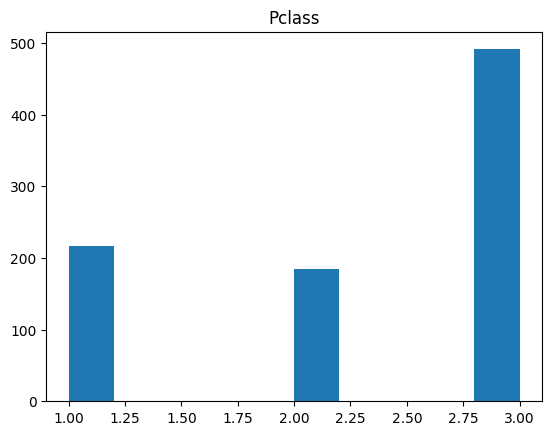

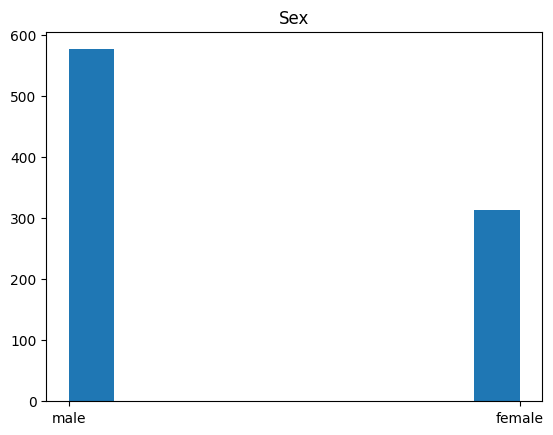

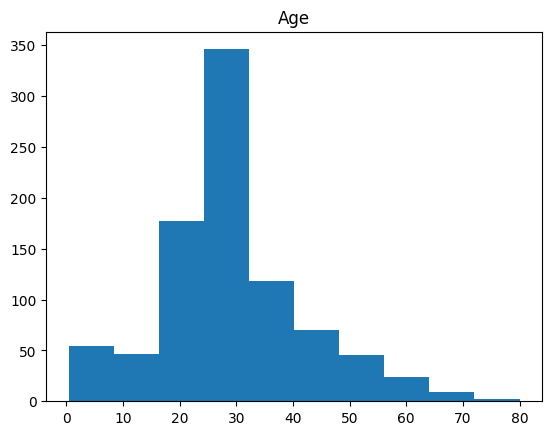

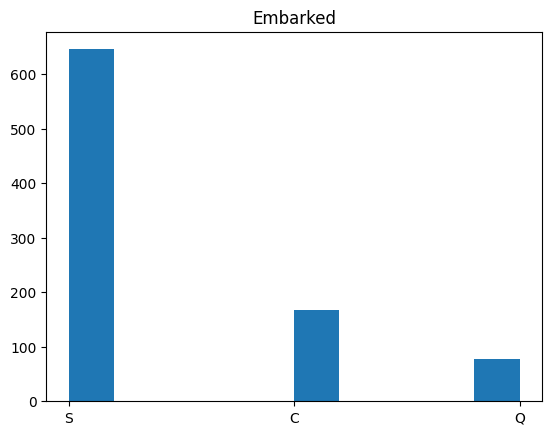

In [16]:
for col in train_data.columns:
    if col not in ['Ticket', 'Cabin']:
        p = plt.figure()
        plt.hist(train_data[col])
        plt.title(col)
        p.show()

In [17]:
train_data['Sex'] = LabelEncoder().fit_transform(train_data['Sex'])
test_data['Sex'] = LabelEncoder().fit_transform(test_data['Sex'])
train_data = pd.get_dummies(train_data, columns=['Pclass'])
test_data = pd.get_dummies(test_data, columns=['Pclass'])
train_data = pd.get_dummies(train_data, columns=['Embarked'])
test_data = pd.get_dummies(test_data, columns=['Embarked'])
train_data.columns

Index(['Sex', 'Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [18]:
test_data.columns

Index(['Sex', 'Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [19]:
test_data

,Sex,Age,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,34.50000,0,0,1,0,1,0
1,0,47.00000,0,0,1,0,0,1
2,1,62.00000,0,1,0,0,1,0
3,1,27.00000,0,0,1,0,0,1
4,0,22.00000,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
413,1,30.27259,0,0,1,0,0,1
414,0,39.00000,1,0,0,1,0,0
415,1,38.50000,0,0,1,0,0,1
416,1,30.27259,0,0,1,0,0,1


In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         891 non-null    int64  
 1   Age         891 non-null    float64
 2   Pclass_1    891 non-null    uint8  
 3   Pclass_2    891 non-null    uint8  
 4   Pclass_3    891 non-null    uint8  
 5   Embarked_C  891 non-null    uint8  
 6   Embarked_Q  891 non-null    uint8  
 7   Embarked_S  891 non-null    uint8  
dtypes: float64(1), int64(1), uint8(6)
memory usage: 19.3 KB


In [21]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         418 non-null    int64  
 1   Age         418 non-null    float64
 2   Pclass_1    418 non-null    uint8  
 3   Pclass_2    418 non-null    uint8  
 4   Pclass_3    418 non-null    uint8  
 5   Embarked_C  418 non-null    uint8  
 6   Embarked_Q  418 non-null    uint8  
 7   Embarked_S  418 non-null    uint8  
dtypes: float64(1), int64(1), uint8(6)
memory usage: 9.1 KB


# Model Training

In [22]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(32, activation='relu', input_shape=(8,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [23]:
train_data = np.array(train_data)
td = tf.convert_to_tensor(train_data, dtype=tf.float32)
Pd = tf.convert_to_tensor(pred_data, dtype=tf.int32)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(td, Pd, epochs=1000, validation_split=0.4)

Epoch 1/1000
17/17 [==============================] - 1s 14ms/step - loss: 2.0292 - accuracy: 0.4082 - val_loss: 0.6878 - val_accuracy: 0.6275
Epoch 2/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.7999 - accuracy: 0.6161 - val_loss: 0.6550 - val_accuracy: 0.6275
Epoch 3/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.6491 - accuracy: 0.6573 - val_loss: 0.6278 - val_accuracy: 0.6471
Epoch 4/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.6285 - accuracy: 0.6367 - val_loss: 0.6208 - val_accuracy: 0.6471
Epoch 5/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.6213 - accuracy: 0.6348 - val_loss: 0.6119 - val_accuracy: 0.6471
Epoch 6/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.6176 - accuracy: 0.6891 - val_loss: 0.6052 - val_accuracy: 0.6471
Epoch 7/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.6051 - accuracy: 0.6386 - val_loss: 0.5929 - val_accuracy: 0.6583
Epoch

In [24]:
model.evaluate(td, Pd)
p = model.predict(tf.convert_to_tensor(test_data, dtype=tf.float32))
p = p.round()
p = p.astype(int)
p

14/14 [==============================] - 0s 1ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
    

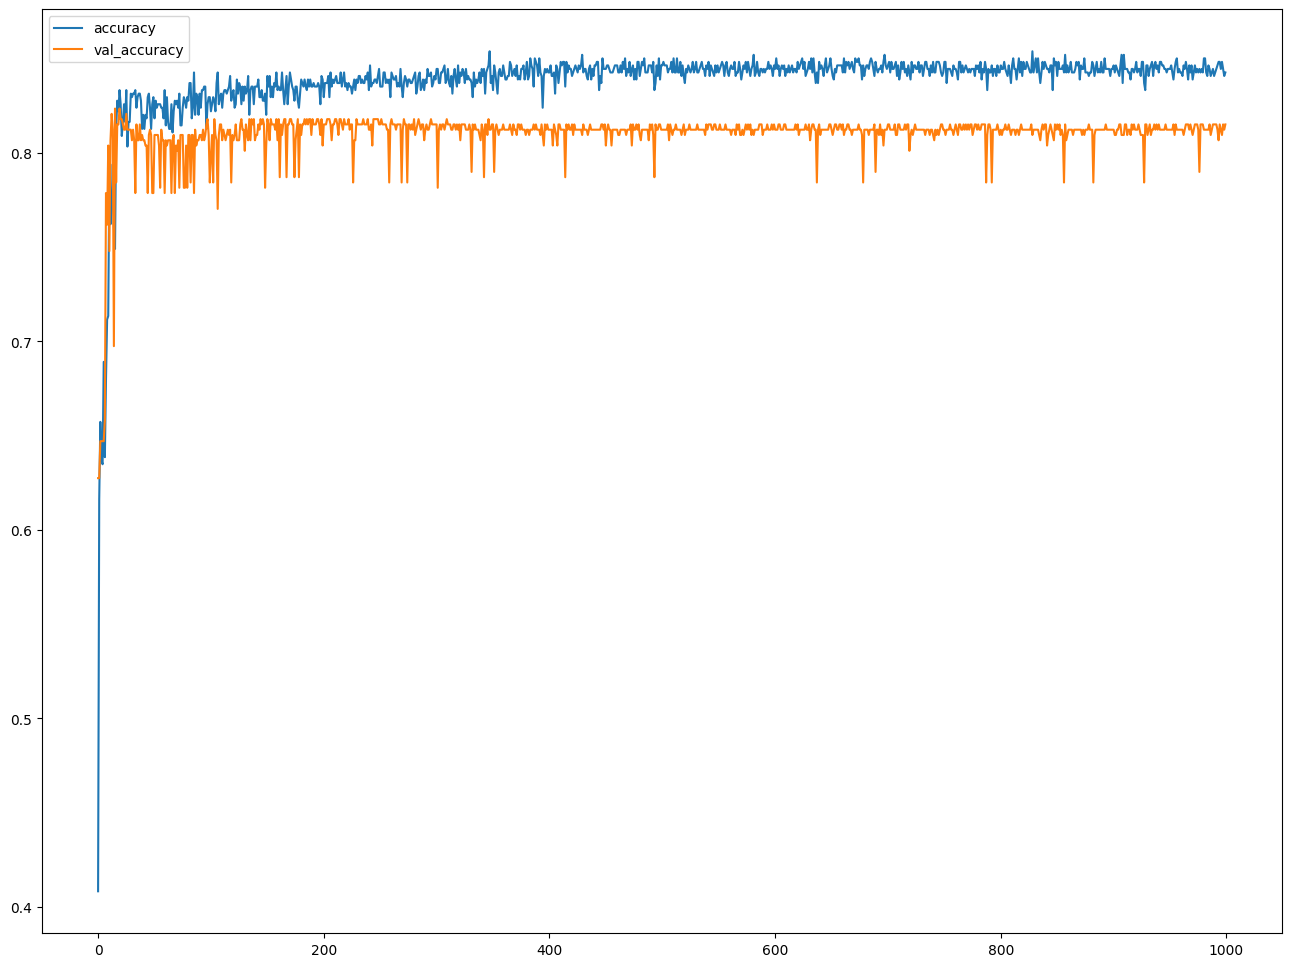

In [25]:
plt.figure(figsize=[16, 12])
plt.plot(h.history['accuracy'], label='accuracy')
plt.plot(h.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [26]:
test_PassengerId = np.reshape(test_PassengerId, (-1,))
p = np.reshape(p, (-1,))

In [27]:
submission = pd.DataFrame(
    {
        "PassengerId": test_PassengerId,
        "Survived": p
    }
)
submission.to_csv('submission.csv', index=False)